<a href="https://colab.research.google.com/github/SoumyajeetM/ARIMA_Sales_Forecasting/blob/main/ARIMA_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.6 MB/s eta 0:00:00


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 306.761
Date:                Wed, 25 Sep 2024   AIC                           -607.522
Time:                        12:48:47   BIC                           -601.786
Sample:                             0   HQIC                          -605.337
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      6.342      0.000       0.001       0.001
ma.L1          0.2526      0.137      1.842      0.065      -0.016       0.521
sigma2      2.737e-07   5.48e-08      4.992      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


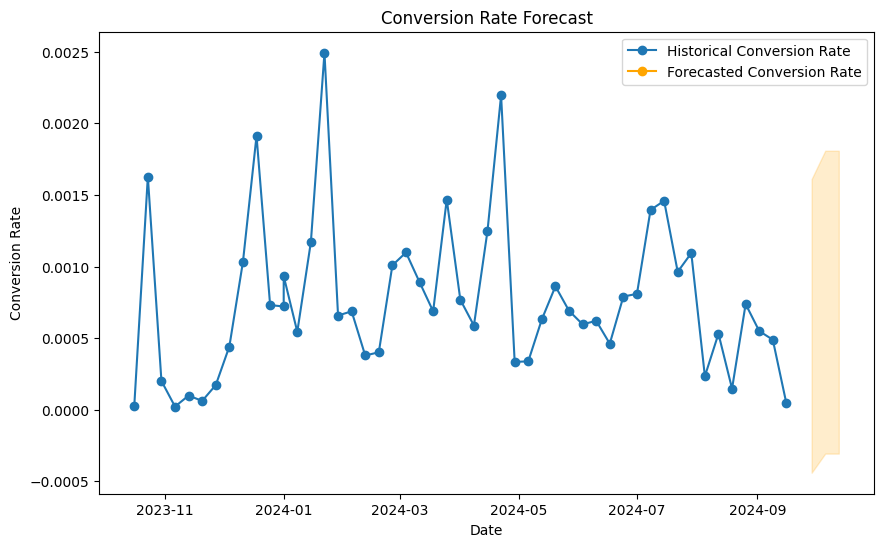

In [17]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'Model.xlsx'  # Update the path if necessary
sheet_name = 'Year Week Number'

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the dataframe
# print(df.head())

# Convert 'Year Week Number' to datetime format
# Extract year and week number and convert to first day of the week (Monday)
df['Year Week Number'] = df['Year Week Number'].str.split('-W').apply(lambda x: f"{x[0]}-W{x[1]}-1")
df['Year Week Number'] = pd.to_datetime(df['Year Week Number'], format='%Y-W%W-%w')

# Convert 'Conversion Rate' to decimal
# Convert to string first to handle any non-string values
df['Conversion Rate'] = df['Conversion Rate'].astype(str).str.rstrip('%').astype(float) / 100

# Set the index to 'Year Week Number'
df.set_index('Year Week Number', inplace=True)

# Fit the Auto ARIMA model
model = pm.auto_arima(df['Conversion Rate'], seasonal=False, stepwise=True, suppress_warnings=True)

# Print model summary
print(model.summary())

# Forecast the next 3 periods (weeks)
forecast, conf_int = model.predict(n_periods=3, return_conf_int=True)

# Create a new DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(weeks=1), periods=3, freq='W')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Conversion Rate'], label='Historical Conversion Rate', marker='o')
plt.plot(forecast_df, label='Forecasted Conversion Rate', marker='o', color='orange')
plt.fill_between(forecast_df.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2)
plt.title('Conversion Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.legend()
plt.show()

In [8]:
import numpy as np# Assuming you have the actual values in 'y_actual' and the predicted values in 'forecast'
y_actual = df['Conversion Rate'].values[-3:]  # Adjust this based on your actual test values
y_predicted = forecast  # Your predicted values from the model

# Calculate MAE
mae = np.mean(np.abs(y_actual - y_predicted))

# Calculate MSE
mse = np.mean((y_actual - y_predicted) ** 2)

# Calculate MAPE
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100

# Print the results
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"MAPE: {mape}%")


MAE: 0.00033530147826739816
MSE: 1.90241216017103e-07
MAPE: 561.5405359336927%


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   50
Model:               SARIMAX(0, 0, 1)   Log Likelihood                 306.761
Date:                Wed, 25 Sep 2024   AIC                           -607.522
Time:                        12:51:41   BIC                           -601.786
Sample:                             0   HQIC                          -605.337
                                 - 50                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.000      6.342      0.000       0.001       0.001
ma.L1          0.2526      0.137      1.842      0.065      -0.016       0.521
sigma2      2.737e-07   5.48e-08      4.992      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


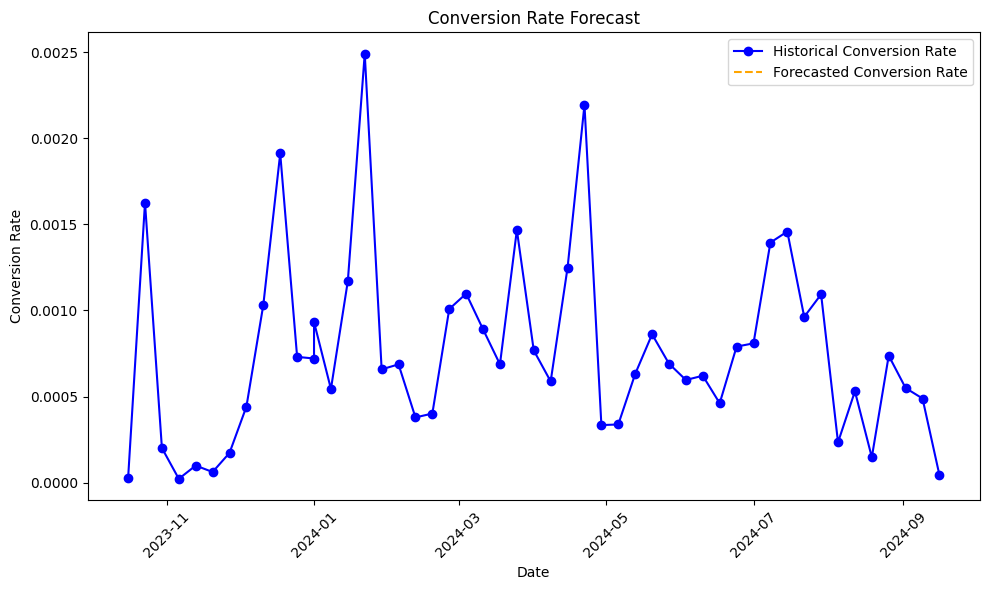

In [19]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = 'Model.xlsx'  # Update the path if necessary
sheet_name = 'Year Week Number'

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Convert 'Year Week Number' to datetime format
df['Year Week Number'] = df['Year Week Number'].str.split('-W').apply(lambda x: f"{x[0]}-W{x[1]}-1")
df['Year Week Number'] = pd.to_datetime(df['Year Week Number'], format='%Y-W%W-%w')

# Convert 'Conversion Rate' to decimal
df['Conversion Rate'] = df['Conversion Rate'].astype(str).str.rstrip('%').astype(float) / 100

# Set the index to 'Year Week Number'
df.set_index('Year Week Number', inplace=True)

# Fit the Auto ARIMA model
model = pm.auto_arima(df['Conversion Rate'], seasonal=False, stepwise=True, suppress_warnings=True)

# Print model summary
print(model.summary())

# Forecast the next 3 periods (weeks)
forecast, conf_int = model.predict(n_periods=3, return_conf_int=True)

# Create a new DataFrame for the forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(weeks=1), periods=3, freq='W')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Conversion Rate'], label='Historical Conversion Rate', marker='o', color='blue')  # Historical data
plt.plot(forecast_df, label='Forecasted Conversion Rate', color='orange', linestyle='--')  # Forecasted data
plt.title('Conversion Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


In [20]:
# Create a new DataFrame for the forecast
# forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(weeks=1), periods=4, freq='W')
# forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Print the forecasted values table
print("\nForecasted Conversion Rates for the Next Month:")
print(forecast_df)


Forecasted Conversion Rates for the Next Month:
            Forecast
2024-09-29       NaN
2024-10-06       NaN
2024-10-13       NaN


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data from the Excel file
file_path = 'Model.xlsx'  # Update the path if necessary
sheet_name = 'Year Week Number'

# Read the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the dataframe
print(df.head())

# Ensure the relevant columns are in the correct format (numeric)
df['Disbursed Loans'] = pd.to_numeric(df['Disbursed Loans'], errors='coerce')
df['Total applications'] = pd.to_numeric(df['Total applications'], errors='coerce')

# Drop any rows with NaN values (if any)
df.dropna(subset=['Disbursed Loans', 'Total applications'], inplace=True)

# Split the data into features and target
X = df[['Total applications']]
y = df['Disbursed Loans']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Example prediction
total_applications = 1000  # Replace with your value
predicted_disbursed = rf_model.predict([[total_applications]])
print(f"Predicted Disbursed Loans for {total_applications} applications: {predicted_disbursed[0]}")


  Year Week Number  Disbursed Loans  Total applications  Conversion Rate
0         2023-W42                3                1205         0.002490
1         2023-W43              159                 977         0.162743
2         2023-W44               88                4381         0.020087
3         2023-W45               30               13791         0.002175
4         2023-W46               79                8003         0.009871
Mean Absolute Error: 233.80699999999996
Mean Squared Error: 80546.67511
R² Score: -0.19097904603593863
Predicted Disbursed Loans for 1000 applications: 204.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
